In [ ]:
import notebook_setup
from notebook_setup import MODELS_DIR


import numpy as np
import plotly.graph_objects as go


from gpmdm.gpmdm import GPMDM
from dataset_utils.mocap_labels import WALK_TRIALS_TRAIN, WALK_TRIALS_TEST, RUN_TRIALS_TRAIN, RUN_TRIALS_TEST
import dataset_utils.select_joints as select_joints

In [ ]:
model_path = MODELS_DIR / 'gpmdm' / 'gpmdm_2024_12_04.pth'
gpdm = GPMDM.load(model_path)

In [3]:
reduced_columns = WALK_TRIALS_TRAIN[0].get_columns_for_joints(select_joints.WALKING_SIMPLIFIED_JOINTS)
DOFs = len(reduced_columns)
print(f"Number of DOFs: {DOFs}")

# By default, the dataset is 120 fps
# We can downsample it (DOWNSAMPLE of 5 divides the frame rate by 5)
DOWNSAMPLE = 5

walk_train_dfs = [trial.as_dataframe() for trial in WALK_TRIALS_TRAIN]
walk_train_arrs = [df[reduced_columns].to_numpy().astype(np.float32)[::DOWNSAMPLE, :] for df in walk_train_dfs]

run_train_dfs = [trial.as_dataframe() for trial in RUN_TRIALS_TRAIN]
run_train_arrs = [df[reduced_columns].to_numpy().astype(np.float32)[::DOWNSAMPLE, :] for df in run_train_dfs]

WALK_LABEL = 0
RUN_LABEL = 1

Number of DOFs: 35


In [4]:
walk_train_dfs = [trial.as_dataframe() for trial in WALK_TRIALS_TRAIN]
walk_train_arrs = [df[reduced_columns].to_numpy().astype(np.float32)[::DOWNSAMPLE, :] for df in walk_train_dfs]

run_train_dfs = [trial.as_dataframe() for trial in RUN_TRIALS_TRAIN]
run_train_arrs = [df[reduced_columns].to_numpy().astype(np.float32)[::DOWNSAMPLE, :] for df in run_train_dfs]


In [6]:

# Assuming gpdm.get_X_for_class is your method to get the data
X0 = gpdm.get_X_for_class(0).detach().numpy()
X1 = gpdm.get_X_for_class(1).detach().numpy()

# Create the plot
fig = go.Figure()

# Add Class 0 data (in blue)
fig.add_trace(go.Scatter3d(
    x=X0[:, 0],
    y=X0[:, 1],
    z=X0[:, 2],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Class 0'
))

# Add Class 1 data (in red)
fig.add_trace(go.Scatter3d(
    x=X1[:, 0],
    y=X1[:, 1],
    z=X1[:, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Class 1'
))

# Update layout with axis labels and title
fig.update_layout(
    title="3D Latent Space Plot",
    scene=dict(
        xaxis_title="X-axis",
        yaxis_title="Y-axis",
        zaxis_title="Z-axis"
    )
)

# Show the interactive plot
fig.show()

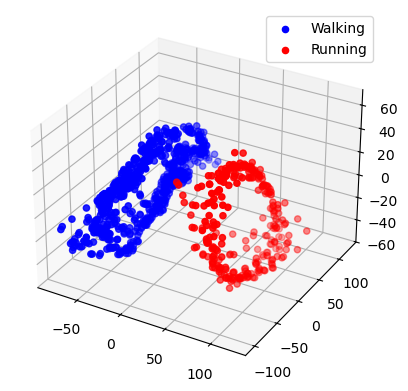

In [7]:
# Make matplotlib scatter plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X0[:, 0], X0[:, 1], X0[:, 2], c='b', marker='o', label='Walking')
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c='r', marker='o', label='Running')

ax.legend()

